In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy.stats

import re

In [ ]:
df=pd.read_csv("sample_data/protective.csv")
df.drop(["trans_dest","trans_src"], axis=1, inplace=True) 
print("complete")


complete


# New Section

In [ ]:
false=["DNA.csv","cancer.csv","children.csv","exp.csv","tech.csv"]

In [ ]:
for c in df.columns:
  nan_count=df[c].isnull().sum()
  if(nan_count>df.shape[0]/2):
    df.drop(c, axis=1, inplace=True) 

In [ ]:
print("complete")

complete


In [ ]:
df.language.unique()
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df_english=df[df["language"].str.contains("en")]
df_english["tweet"]=df_english["tweet"].str.replace(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)",'')
df_english["tweet"]=df_english["tweet"].str.strip()
df_english=df_english[df_english["tweet"].str.len()>50]
df_english=df_english[df_english["tweet"].str.contains("vaccine| Vaccine")]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_negate=df_english[df_english["tweet"].str.contains(("not | false | don't | Not | False | n't | Don't | wrong | Fake | fake | FAKE "))]
df_english=df_english[df_english["tweet"].str.contains(("not | false | don't| Not| False| n't | Don't | wrong | Fake | fake | FAKE "))==False]

In [ ]:
print(df_negate.shape)
print(df_english.shape)

(2792, 22)
(8355, 22)


In [ ]:
cnt_negate=0
cnt_reg=0
for r in df_negate.photos:
  if(len(r)!=2):
    cnt_negate+=1

for r in df_english.photos:
  if(len(r)!=2):
    cnt_reg+=1

print(cnt_negate/df_negate.shape[0])
print(cnt_reg/df_english.shape[0])

0.07987106017191978
0.16804308797127468


In [ ]:
df_negate=df_negate[df_negate.likes_count!=0]
df_english=df_english[df_english.likes_count!=0]

In [ ]:
print("OG number is: ", df_english.shape[0])
print("negation number is: ", df_negate.shape[0])
print("ratio fake to negation: ", df_english.shape[0]/df_negate.shape[0])
print("\nnegation news")
print(df_negate.likes_count.mean())
print(df_negate.likes_count.std())
print(df_negate.retweets_count.mean())
print(df_negate.replies_count.mean())
print("\nOG news ")
print(df_english.likes_count.mean())
print(df_english.likes_count.std())
print(df_english.retweets_count.mean())
print(df_english.replies_count.mean())



OG number is:  4138
negation number is:  1326
ratio fake to negation:  3.120663650075415

negation news
17.74660633484163
104.86579693032782
2.9328808446455503
1.9125188536953244

OG news 
38.28733687771871
459.0711132374226
7.652005799903335
3.27791203479942


In [ ]:
print(df_negate.shape[0]/len(df_negate.username.unique()))
print(df_english.shape[0]/len(df_english.username.unique()))

1.0263157894736843
1.0770432066631963


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:

stop_word_dic={}

with open('sample_data/extra_stop.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            # displaying the words           
            stop_word_dic[word]=word
with open('sample_data/stop_words_english.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            # displaying the words           
            stop_word_dic[word]=word



closed_class_stop_words = ['a', 'the', 'an', 'and', 'or', 'but', 'about', 'above', 'after', 'along', 'amid', 'among', \
                           'as', 'at', 'by', 'for', 'from', 'in', 'into', 'like', 'minus', 'near', 'of', 'off', 'on', \
                           'onto', 'out', 'over', 'past', 'per', 'plus', 'since', 'till', 'to', 'under', 'until', 'up', \
                           'via', 'vs', 'with', 'that', 'can', 'cannot', 'could', 'may', 'might', 'must', \
                           'need', 'ought', 'shall', 'should', 'will', 'would', 'have', 'had', 'has', 'having', 'be', \
                           'is', 'am', 'are', 'was', 'were', 'being', 'been', 'get', 'gets', 'got', 'gotten', \
                           'getting', 'seem', 'seeming', 'seems', 'seemed', \
                           'enough', 'both', 'all', 'your' 'those', 'this', 'these', \
                           'their', 'the', 'that', 'some', 'our', 'no', 'neither', 'my', \
                           'its', 'his' 'her', 'every', 'either', 'each', 'any', 'another', \
                           'an', 'a', 'just', 'mere', 'such', 'merely' 'right', 'no', 'not', \
                           'only', 'sheer', 'even', 'especially', 'namely', 'as', 'more', \
                           'most', 'less' 'least', 'so', 'enough', 'too', 'pretty', 'quite', \
                           'rather', 'somewhat', 'sufficiently' 'same', 'different', 'such', \
                           'when', 'why', 'where', 'how', 'what', 'who', 'whom', 'which', \
                           'whether', 'why', 'whose', 'if', 'anybody', 'anyone', 'anyplace', \
                           'anything', 'anytime' 'anywhere', 'everybody', 'everyday', \
                           'everyone', 'everyplace', 'everything' 'everywhere', 'whatever', \
                           'whenever', 'whereever', 'whichever', 'whoever', 'whomever' 'he', \
                           'him', 'his', 'her', 'she', 'it', 'they', 'them', 'its', 'their', 'theirs', \
                           'you', 'your', 'yours', 'me', 'my', 'mine', 'I', 'we', 'us', 'much', 'and/or',"wa","ha",",","n't" ,"”" ,"“" ,"’"
                           ]

In [ ]:

def make_dic():
  for stop in closed_class_stop_words:
    stop_word_dic[stop]=stop
            
make_dic()  

def clean_me(string):
  return remove_stop_words(word_tokenize(string))

def remove_stop_words(text):
  result=[]
  for word in text:
    word=word.lower()
    word=lemmatizer.lemmatize(word)
    if word in stop_word_dic:
      continue
    else:
      result.append(word)
  return result


     




In [ ]:
def clean_data_frame(df):
  text=df["tweet"]
  clean_text=[]
  df_clean=pd.DataFrame()
  for index, row in df.iterrows():
    text=row["tweet"]
    res=clean_me(text)
    clean_text.append(res)  
  return pd.DataFrame({'Clean_tweet': clean_text})

df_clean_true_list=clean_data_frame(df_negate)
df_clean_false_list=clean_data_frame(df_english)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def sentiment_finder(df,name):
  neg_list=[]
  pos_list=[]
  for i in df["Clean_tweet"]:
    text=' '.join([str(item)for item in i])
    res=sid.polarity_scores(text)
    if(res['neg']!=0): 
      neg_list.append(res['neg'])
    if(res['pos']!=0):
      pos_list.append(res['pos'])
  print(name)
  print(sum(neg_list)/len(neg_list))
  print(sum(pos_list)/len(pos_list))
  

sentiment_finder(df_clean_true_list,"true")
sentiment_finder(df_clean_false_list,"fake")


true
0.22969037199124714
0.25761509433962293
fake
0.20863389986219605
0.26300194080543493


In [ ]:
def sentiment_finder(df,name):
  neg_list=[]
  pos_list=[]
  for i in df["tweet"]:
    text=' '.join([str(item)for item in i])
    res=sid.polarity_scores(text)

    neg_list.append(res['neg'])
   
    pos_list.append(res['pos'])
  print(name)
  print(sum(neg_list)/len(neg_list))
  print(sum(pos_list)/len(pos_list))
  

sentiment_finder(df_negate,"true")
sentiment_finder(df_english,"fake")

true
0.0
0.0
fake
0.0
0.0


In [ ]:
date=df_english.groupby('date').size().sort_values(ascending=False)[0:5]
df1=date.reset_index()
df1

,date,0
0,2021-06-02,63
1,2020-12-18,53
2,2021-03-06,51
3,2021-05-26,48
4,2021-11-11,44


In [ ]:
date=df_negate.groupby('date').size().sort_values(ascending=False)[0:5]
df1=date.reset_index()
df1

,date,0
0,2021-03-06,22
1,2021-04-30,19
2,2021-03-29,19
3,2021-05-26,18
4,2021-05-16,17


In [ ]:
x=51/5506
y=32/2511

print(x," ", y)

0.009262622593534326   0.012743926722421346


In [2]:
df_combined_false=pd.DataFrame()
df_combined_true=pd.DataFrame()



In [4]:
false=["/content/sample_data/vaccine_spike_protein.csv",
"/content/sample_data/covid_vaccine_cause_cancer.csv",
"/content/sample_data/Children_die_covid_vaccine.csv",
"/content/sample_data/vaccine_experimental_technology.csv",
"/content/sample_data/vaccine_gene_therapy.csv",
"/content/sample_data/covid_vaccine_change_DNA.csv",
"/content/sample_data/covid_vaccine_microchips.csv","/content/sample_data/vaccine_death_rate.csv","/content/sample_data/vaccine_death_rate.csv"] #"/content/sample_data/vaccine_death_rate.csv"
true=["/content/sample_data/covid_vaccine_safe_for_people.csv","/content/sample_data/covid_vaccine_protect.csv","/content/sample_data/covid_vaccine_is_working.csv","/content/sample_data/CDC_approve_covid_vaccine.csv","/content/sample_data/covid_booster_beneficial.csv","/content/sample_data/covid_vaccine_decrease_death_rate.csv"]
filter=False
for f in false:
  df=pd.read_csv(f)
  df.drop(["trans_dest","trans_src"], axis=1, inplace=True) 
  print("complete")
  for c in df.columns:
    nan_count=df[c].isnull().sum()
    if(nan_count>df.shape[0]/2):
      df.drop(c, axis=1, inplace=True) 
  df.language.unique()
  df = df.dropna()
  df = df.reset_index(drop=True)
  df_english=df[df["language"].str.contains("en")]
  df_english["tweet"]=df_english["tweet"].str.replace(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)",'')
  df_english["tweet"]=df_english["tweet"].str.strip()
  df_english=df_english[df_english["tweet"].str.len()>50]
  df_english=df_english[df_english["tweet"].str.contains("vaccine| Vaccine")]
  df_negate=df_english[df_english["tweet"].str.contains(("no | not | false | don't | Not | False | n't | Don't | wrong | Fake | fake | FAKE "))]
  df_english=df_english[df_english["tweet"].str.contains(("no | not | false | don't| Not| False| n't | Don't | wrong | Fake | fake | FAKE "))==False]
  if(filter):
    #sF='sample_data/false/'+ f[12:]
    #sT='sample_data/true/'+ f[12:]
    #df_english.to_csv(sT) 
    #df_negate.to_csv(sF)
    df_combined_false=df_combined_false.append(df_negate)
    df_combined_true=df_combined_true.append(df_english)
  else: 
    #sF='sample_data/false/'+ f[12:]
    #sT='sample_data/true/'+ f[12:]
    #df_english.to_csv(sF) 
    #df_negate.to_csv(sT)
    df_combined_false=df_combined_false.append(df_english)
    df_combined_true=df_combined_true.append(df_negate)
  
  df_negate=df_negate[df_negate.likes_count>=0]
  df_english=df_english[df_english.likes_count>=0]
  df_negate=df_negate[df_negate.retweets_count>=0]
  df_english=df_english[df_english.retweets_count>=0]
  #df_negate=df_negate[df_negate.replies_count!=0]
  #df_english=df_english[df_english.replies_count>=2]
  len_n=df_negate.shape[0]
  len_o=df_english.shape[0]
  print(len_o)
  print(len_n)

  ncount=df_negate.likes_count.mean()
  ogcount=df_english.likes_count.mean()
  print("likes "," n: " , ncount, " o: ", ogcount, "dif is " ,ogcount-ncount)
  if(ogcount>ncount):
    print("this is true news")
  else:
    print("this is false")

  ncount=df_negate.retweets_count.mean()
  ogcount=df_english.retweets_count.mean()
  print("\n")
  print("retweet "," n: " , ncount, " o: ", ogcount, "dif is " ,ogcount-ncount)
  if(ogcount>ncount):
    print("this is true news")
  else:
    print("this is false")

  #dif_mean=abs(ncount-ogcount)
  #se_n=df_negate.likes_count.var()/len_n
  #se_o=df_english.likes_count.var()/len_o
  #degres_freedom_top=(se_n+se_o)**2
  #deg_freedom_bottom=((se_n**2)/(len_n-1))+((se_o**2)/(len_o-1))
  #deg_f=degres_freedom_top/deg_freedom_bottom
  #combined_se=np.sqrt(se_n+se_o)
  #Ho=dif_mean/combined_se
  like="likes_count"
  retweet="retweets_count" 
  #rep="replies_count"
  #runHo(df_negate,df_english,like)
  #runHo(df_negate,df_english,retweet)
  #runHo(df_negate,df_english,rep)
  print(" \n\n\n")

  



complete
3814
1138
likes   n:  4.3796133567662565  o:  11.358940744625066 dif is  6.97932738785881
this is true news


retweet   n:  1.1212653778558874  o:  3.085212375458836 dif is  1.9639469976029484
this is true news
 



complete
1388
886
likes   n:  8.399548532731377  o:  6.4185878962536025 dif is  -1.980960636477774
this is false


retweet   n:  2.369074492099323  o:  1.8335734870317002 dif is  -0.5355010050676228
this is false
 



complete
2682
1632
likes   n:  16.175245098039216  o:  8.80835197613721 dif is  -7.366893121902006
this is false


retweet   n:  5.1525735294117645  o:  2.7486950037285607 dif is  -2.403878525683204
this is false
 



complete
1388
886
likes   n:  8.399548532731377  o:  6.4185878962536025 dif is  -1.980960636477774
this is false


retweet   n:  2.369074492099323  o:  1.8335734870317002 dif is  -0.5355010050676228
this is false
 



complete
1964
1257
likes   n:  3.330151153540175  o:  4.253564154786151 dif is  0.9234130012459758
this is true news


re

In [ ]:
def runHo(df_negate,df_english,feature):
  len_n=df_negate.shape[0]
  len_o=df_english.shape[0]

  ncount=df_negate[feature].mean()
  ogcount=df_english[feature].mean()
  dif_mean=abs(ncount-ogcount)
  se_n=df_negate[feature].var()/len_n
  se_o=df_english[feature].var()/len_o
  degres_freedom_top=(se_n+se_o)**2
  deg_freedom_bottom=((se_n**2)/(len_n-1))+((se_o**2)/(len_o-1))
  deg_f=degres_freedom_top/deg_freedom_bottom
  combined_se=np.sqrt(se_n+se_o)
  Ho=dif_mean/combined_se

  print("the Ho test for", feature," is ", Ho ," and the degress of freedom are ",deg_f,"  p-val: ",scipy.stats.t.sf(abs(Ho), deg_f))

In [7]:
df_T=df_combined_true[df_combined_true["replies_count"]>=10]
df_F=df_combined_false[df_combined_false["replies_count"]>=10]
df_T.drop('user_id', axis=1, inplace=True) 
df_F.drop('user_id', axis=1, inplace=True) 
df_T.drop('video', axis=1, inplace=True) 
df_F.drop('video', axis=1, inplace=True) 
display("true",df_T.describe())
display("false",df_F.describe())

'true'

,replies_count,retweets_count,likes_count
count,685.000000,685.000000,685.000000
mean,68.538686,167.598540,943.451095
std,205.489695,673.090442,5180.158926
min,10.000000,0.000000,0.000000
25%,13.000000,8.000000,44.000000
50%,22.000000,30.000000,143.000000
75%,45.000000,93.000000,419.000000
max,3475.000000,11502.000000,98626.000000


'false'

,replies_count,retweets_count,likes_count
count,593.000000,593.000000,593.000000
mean,45.129848,136.674536,583.077572
std,85.036588,635.514056,2209.001938
min,10.000000,0.000000,0.000000
25%,12.000000,6.000000,55.000000
50%,18.000000,29.000000,135.000000
75%,37.000000,91.000000,363.000000
max,764.000000,9957.000000,28180.000000


In [ ]:
  if(filter):
    sF='sample_data/false/'+ f[12:]
    sT='sample_data/true/'+ f[12:]
    df_english.to_csv(sT) 
    df_negate.to_csv(sF)
  else: 
    sF='sample_data/false/'+ f[12:]
    sT='sample_data/true/'+ f[12:]
    df_english.to_csv(sF) 
    df_negate.to_csv(sT)

In [ ]:
fasle=['sample_data/false/DNA.csv',
'sample_data/false/booster.csv',
'sample_data/false/cancer.csv',
'sample_data/false/cdc.csv',
'sample_data/false/children.csv',
'sample_data/false/dec_death.csv',
'sample_data/false/dec_hospital.csv',
'sample_data/false/exp.csv',
'sample_data/false/tech.csv',
'sample_data/false/vac_safe.csv',
'sample_data/false/vax_working.csv']


In [ ]:
print(df_combined_false.shape)
print(df_combined_true.shape)

(36609, 22)
(34912, 22)


In [ ]:
df_combined_false.retweets_count.mean()

2.703979895654074

In [ ]:
df_combined_true.retweets_count.mean()

4.220124885426214

In [ ]:
date=df_combined_false.groupby('username').size().sort_values(ascending=False)[0:10]
df1=date.reset_index()
df1

,username,0
0,lulu111593,51
1,koudijshenk,35
2,vaccinemyths,32
3,lazo_jenn,29
4,jesusdied4_us,27
5,_timos_,26
6,biologicmodels,25
7,nytscience,23
8,nythealth,21
9,outbreaksci,21


In [ ]:
date=df_combined_true.groupby('username').size().sort_values(ascending=False)[0:10]
df1=date.reset_index()
df1

,username,0
0,vaccinemyths,54
1,richard57482547,21
2,drtessat,21
3,richiesquest,19
4,roadtoserfdom3,18
5,cadoctorj1,18
6,agereimagined,13
7,cdphe,12
8,nanogenomic,12
9,ginscience1,12


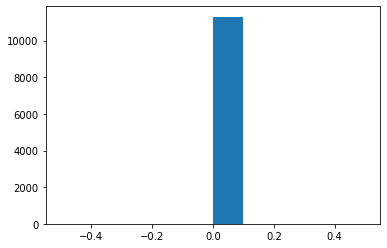

In [ ]:
import matplotlib.pyplot as plt
flase_plot=df_combined_false[(df_combined_false.likes_count==0) ]
plt.hist(flase_plot.likes_count)

plt.show()




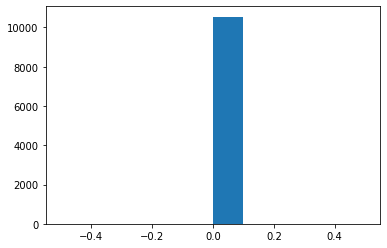

In [ ]:
import matplotlib.pyplot as plt
true_plot=df_combined_true[(df_combined_true.likes_count==0)]
plt.hist(true_plot.likes_count)

plt.show()


In [ ]:
for df, type in [(fake_df, 'fake'), (real_df, 'real')]:
    # Distributions of like count, reply count, retweet count
    like_count = df['likes_count'][(df['likes_count'] < 500) & (df['likes_count'] > 10)]
    likeintervals = [0,1,10,100,1000,10000,100000000]
    df["like_interval"] = pd.cut(df["likes_count"],bins=likeintervals)
    plt.hist(like_count, bins=50)
    plt.title('Like Count Distribution - {}'.format(type))
    plt.savefig('results/plots/like_count_distribution_{}.jpg'.format(type))
    plt.clf()
    reply_count = df['replies_count'][(df['replies_count'] < 500) & (df['replies_count'] > 10)]
    replyintervals = [0,1,10,100,1000,10000,100000000]
    df["replies_interval"] = pd.cut(df["replies_count"],bins=replyintervals)   
    plt.hist(reply_count, bins=50)
    plt.title('Reply Count Distribution - {}'.format(type))
    plt.savefig('results/plots/reply_count_distribution_{}.jpg'.format(type))
    plt.clf()
    retweet_count = df['retweets_count'][(df['retweets_count'] < 500) & (df['retweets_count'] > 10)]
    plt.hist(retweet_count, bins=50)
    retweetintervals = [0,1,10,100,1000,10000,100000000]
    df["retweet_interval"] = pd.cut(df["retweets_count"],bins=retweetintervals)   
    plt.title('Retweet Count Distribution - {}'.format(type))
    plt.savefig('results/plots/retweet_count_distribution_{}.jpg'.format(type))
    plt.clf()
for df, type in [(fake_df, 'fake'), (real_df, 'real')]:
    print(type)
    print(df['like_interval'].value_counts(normalize=True) * 100)
for df, type in [(fake_df, 'fake'), (real_df, 'real')]:
    print(type)
    print(df['replies_interval'].value_counts(normalize=True) * 100)
for df, type in [(fake_df, 'fake'), (real_df, 'real')]:
    print(type)
    print(df['retweet_interval'].value_counts(normalize=True) * 100)